In [1]:
from vectors import *
from draw2d import *
from draw3d import *
from colors import *

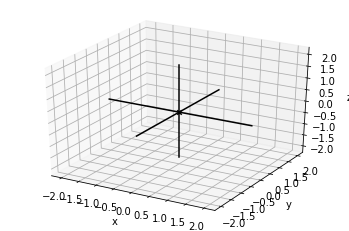

In [2]:
draw3d()

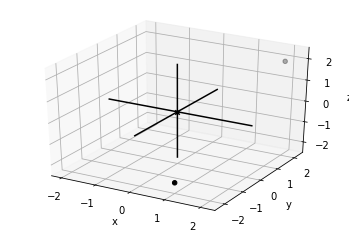

In [3]:
draw3d(
    Points3D((2, 2, 2), (1, -2, -2))
)

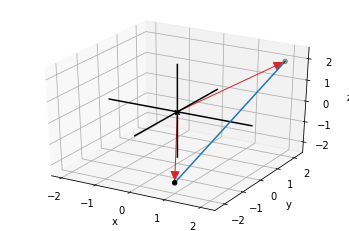

In [4]:
draw3d(
    Points3D((2, 2, 2), (1, -2, -2)),
    Arrow3D((2, 2, 2)),
    Arrow3D((1, -2, -2)),
    Segment3D((2, 2, 2), (1, -2, -2))
)

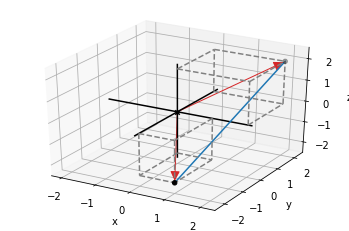

In [5]:
draw3d(
    Points3D((2, 2, 2), (1, -2, -2)),
    Arrow3D((2, 2, 2)),
    Arrow3D((1, -2, -2)),
    Segment3D((2, 2, 2), (1, -2, -2)),
    Box3D(2, 2, 2),
    Box3D(1, -2, -2)
)

## Draw the 3D arrow and point representing the coordinates (-1, -2, 2) as well as the dashed box that makse the arrow look 3D.

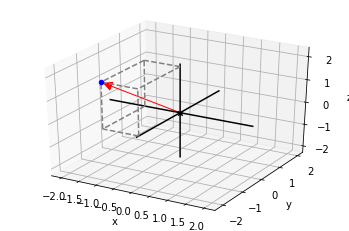

In [6]:
draw3d(
    Points3D((-1, -2, 2), color = 'blue'),
    Arrow3D((-1, -2, 2), color = 'red'),
    Box3D(-1, -2, 2)
)

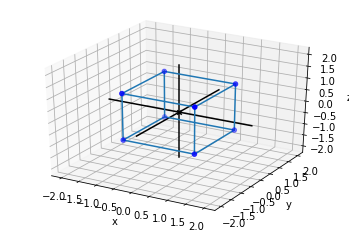

In [7]:
pm1 =  [1, -1]
vertices = [(x, y, z) for x in pm1 for y in pm1 for z in pm1]
edges = [((-1,y,z),(1,y,z)) for y in pm1 for z in pm1] +[((x,-1,z),(x,1,z)) for x in pm1 for z in pm1] +[((x,y,-1),(x,y,1)) for x in pm1 for y in pm1]
draw3d(Points3D(*vertices, color = 'blue'),
     *[Segment3D(*edge) for edge in edges])

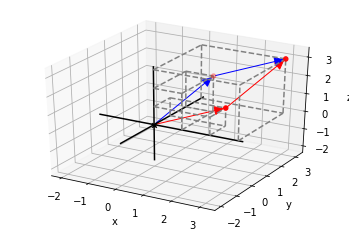

In [8]:
v1 = (2, 1, 1)
v2 = (1, 2, 2)
v3 = (3, 3, 3)
draw3d(
    Points3D(v1, v2, v3, color = 'red'),
    Box3D(2, 1, 1),
    Box3D(1, 2, 2),
    Box3D(3, 3, 3),
    Arrow3D(v1, color = 'red'),
    Arrow3D((3, 3, 3), v1, color = 'red'),
    Arrow3D(v2, color = 'blue'),
    Arrow3D((3, 3, 3), v2, color = 'blue')
      )

In [9]:
def add(*vectors):
    by_coordinates = zip(*vectors)
    coordinate_sums = [sum(coords) for coords in by_coordinates]
    return tuple(coordinate_sums)

In [10]:
list(zip(*[(1, 1, 3), (2, 4, -4), (4, 2, -2)]))

[(1, 2, 4), (1, 4, 2), (3, -4, -2)]

In [11]:
def scalar_mult(alpha, vec):
    coordinate_values = [alpha * xi for xi in vec]
    return tuple(coordinate_values)

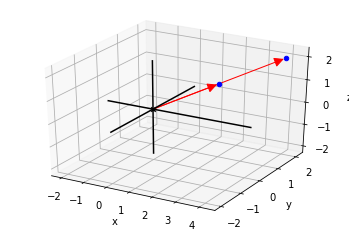

In [12]:
draw3d(Points3D(v1, color = 'blue'),
      Points3D(scalar_mult(2, v1), color = 'blue'),
      Arrow3D(v1, color = 'red'),
      Arrow3D(scalar_mult(2, v1), color = 'red'))

In [13]:
from math import sqrt
def length(v):
    return sqrt(sum([coord ** 2 for coord in v]))

## Draw (4, 0, 3) and (-1, 0, 1) as Arrow3D objects, such that they are placed tip-to-tail in both orders in 3D. What is their vector sum?

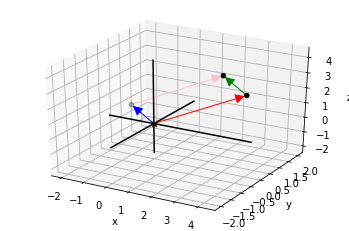

In [14]:
v1 = (4, 0, 3)
v2 = (-1, 0, 1)
v3 = add(v1, v2)
draw3d(Points3D(v1, v2, v3, color = 'black'),
      Arrow3D(v1, color = 'red'),
      Arrow3D(v3, v1, color = 'green'),
      Arrow3D(v2, color = 'blue'),
      Arrow3D(v3, v2, color = 'pink'))

## suppose we set vectors1 = [(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)] and vectors2 = [(1, 2), (3, 4), (5, 6)]. What are teh lengths of zip(*vectors1) and zip(*vectors2)

In [15]:
vectors1 = [(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]
for y in zip(*vectors1):
    print(y)

(1, 6)
(2, 7)
(3, 8)
(4, 9)
(5, 10)


In [16]:
vectors2 = [(1, 2), (3, 4), (5, 6)]
for y in zip(*vectors2):
    print(y)

(1, 3, 5)
(2, 4, 6)


(-4.440892098500626e-16, -7.771561172376096e-16, 7.9999999999999964)


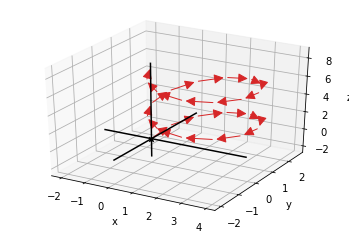

In [17]:
from math import sin, cos, pi
vs = [(sin(pi * t / 6), cos(pi * t / 6), 1.0 / 3) for t in range(0, 24)]

running_sum = (0, 0, 0)
arrows = []
for v in vs:
    next_sum = add(running_sum, v)
    arrows.append(Arrow3D(next_sum, running_sum))
    running_sum = next_sum
print(running_sum)
draw3d(
*arrows
)

Let u = (1, -1, -1) and v = (0, 0, 2). What is the result of u + 1/2 * (v - u)?

In [18]:
u = (1, -1, -1)
v = (0, 0, 2)
add(u, scalar_mult(1/2, add(v ,scalar_mult(-1, u))))

(0.5, -0.5, 0.5)

What is the length of the 2D vector (1, 1)?
What is the length of the 3D vector (1, 1, 1)?
What is the length of the 4D vector (1, 1, 1, 1)?

In [19]:
print(length((1, 1)))
print(length((1, 1, 1)))
print(length((1, 1, 1, 1)))

1.4142135623730951
1.7320508075688772
2.0


Find vectors with whole number lengths

In [20]:
def vector_with_whole_number_length(max_coord = 100):
    for x in range(1, max_coord):
        for y in range(1, x + 1):
            for z in range(1, y + 1):
                if length((x, y, z)).is_integer():
                    yield(x, y, z)

Find a vector in the same direction as (-1, -1, 2) but which has length 1.

In [21]:
alpha = length((-1, -1, 2))
v = scalar_mult(1/alpha, (-1, -1, 2))
length(v)

1.0

In [22]:
def dot(u, v):
    return sum([ui * vi for (ui, vi) in zip(u, v)])

In [23]:
u = (3, 0, 3)
v = (1, 2, -1)
dot(u, v)

0

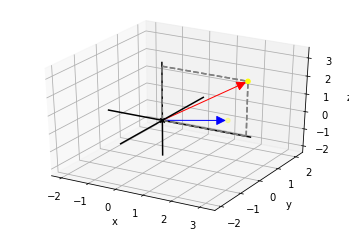

In [27]:
draw3d(Points3D(u, v, color = 'yellow'),
      Arrow3D(u, color = 'red'),
      Arrow3D(v, color = 'blue'),
      Box3D(3, 0, 3))

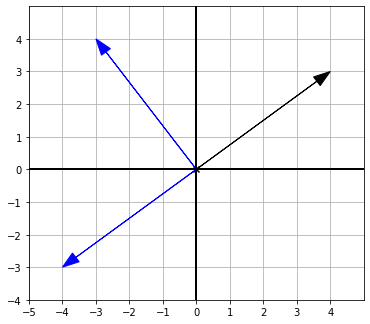

In [31]:
draw2d(Arrow2D((-3, 4), color = 'blue'), 
      Arrow2D((-4, -3), color = 'blue'),
      Arrow2D((4, 3), color = 'black'))

In [32]:
dot((-3, 4), (-4, -3)) == 0

True

In [42]:
from math import acos
def angle_between(v1, v2):
    return acos(dot(v1, v2) / (length(v1) * length(v2)))

Draw the vectors (-4, 1), (1, 2), (3, 2) and compute their dot products

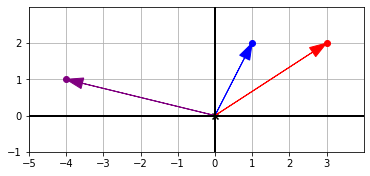

In [43]:
w = (-4, 1)
v = (1, 2)
u = (3, 2)
draw2d(Points2D(w, color = 'purple'),
      Points2D(v, color = 'blue'), 
      Points2D(u, color = 'red'),
      Arrow2D(w, color = 'purple'),
      Arrow2D(v, color = 'blue'),
      Arrow2D(u, color = 'red'))

In [44]:
print('u@v:', dot(u, v))
print('u@w:', dot(u, w))
print('v@w:', dot(v, w))

u@v: 7
u@w: -10
v@w: -2


### What is the dot product of (-1, -1, 1) and (1, 2, 1)? are these two 3D vectors separated by more than 90 degrees, less than 90 degress or exactly 90 degrees

In [45]:
u = (-1, -1, 1)
v = (1, 2, 1)
dot(u, v)

-2

In [46]:
# more than 90 degrees

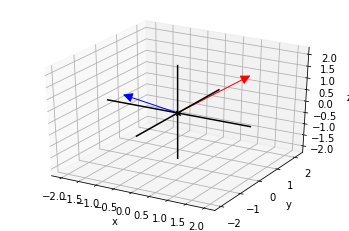

In [48]:
draw3d(Arrow3D((-1, -1, 1), color = 'blue'),
      Arrow3D((1, 2, 1), color = 'red'))

let u and v be vectors, with norm(u) = 3.61 and norm(v) = 1.44. If the angle between u and v is 101.3 degrees, what is u*v?

In [49]:
3.61 * 1.44 * cos(101.3 * pi / 180)

-1.0186064362303022

In [53]:
u = (3, 4)
v = (4, 3)
polar_u = to_polar(u)
polar_v = to_polar(v)
angle_dif = polar_u[1] - polar_v[1]
print(angle_dif)

0.2837941092083278


In [54]:
angle_between(u, v)

0.283794109208328

In [55]:
u = (1, 1, 1)
v = (-1, -1, 1)
angle_between(u, v) * 

1.9106332362490186